# Zadanie 1: Analýza a predspracovanie dát

Zadanie odovzdajte do miesta odovzdania v MS Teams nahraním tohto vypracovaného notebooku a následne potvrdením odovzdania. Bez potvrdenia odovzdania sa zadanie neodošle.

- Dátum a čas zverejnenia: 27.09.2025
- Dátum a čas odovzdania: **26.10.2025 - 23:59**
- Zadanie je hodnotené maximálnym počtom bodov: **20**
- Za každý **načatý deň omeškania** odovzdania zadania **-1 bod**

Úlohou zadania je preukázať a aplikovať vedomosti z oblasti dátovej vedy a to dátovej analýzy a predspracovania dát. Pri vizualizačných technikách využite: histogramy (na určenie distribúcie), box plots (na určenie outlierov), scatter plots (na zobrazenie dát v dvojrozmernej rovine), v prípade potreby použite aj ďalšie vizualizačné techniky.

Zadanie pozostáva z nasledujúcich krokov:
1. Vyberte si jeden z dostupných datasetov:
   - Adult: https://archive.ics.uci.edu/dataset/2/adult
   - Bank Marketing: https://archive.ics.uci.edu/dataset/222/bank+marketing
   - Clickstream Data for Online Shopping: https://archive.ics.uci.edu/dataset/553/clickstream+data+for+online+shopping
   - Heart Disease: https://archive.ics.uci.edu/dataset/45/heart+disease
   - Online Retail: https://archive.ics.uci.edu/dataset/352/online+retail
   - Wine Quality: https://archive.ics.uci.edu/dataset/186/wine+quality
2. Dataset stiahnite a načítajte
3. Podľa dostupného datasetu aplikujte metódy:
   - Deskriptívna analýza
   - Inferenčná analýza (vyberte si jednu techniku)
   - Diagnostická analýza (detailná analýza údajov, korelačná matica)
4. Ak to dataset neurčuje, zvoľte si parameter, na základe ktorého budete deliť dáta do kategórií. Aplikujte metódy vzorkovania a následne zobrazte distribúciu dát podľa zvoleného parametru:
   - vzorkovanie pomocou pravdepodobností (vyberte si jednu metódu)
   - vzorkovanie bez pomoci pravdepodobností (vyberte si jednu metódu)
   - revzorkovanie (vyberte si jednu metódu)
   - podvzorkovanie (vyberte si jednu metódu)
   - prevzorkovanie (vyberte si jednu metódu)
5. Aplikujte metódy manipulácie parametrov:
   - vytvorte nové parametre (aspoň 3)
   - transformujte parametre:
       - vyplňte prázdne hodnoty, ak sú
       - maskujte kategorické parametre (vyberte si jednu metódu)
       - na základe normalizačných techník (vyskúšajte 3 rôzne techniky a porovnajte distribúciu zvoleného parametru)
   - vyskúšajte PCA analýzu:
       - pre nájdenie ideálneho počtu PCA komponentov pomocou dosiahnutia 95% variancie
       - pre vizualizáciu
   - výber parametrov na základe filtrovania: nájdené parametre vypíšte do konzoly 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Načíanie dát z datasetu Wine quality

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Deskriptívna analýza**

In [4]:
print("Pocet riadkov a stlpcov", df.shape)

Pocet riadkov a stlpcov (1599, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
print("chybajuce hodnoty v datasete:")
print(df.isnull().sum())

print("\nPocet duplicitnych riadkov:", df.duplicated().sum())

chybajuce hodnoty v datasete:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Pocet duplicitnych riadkov: 240


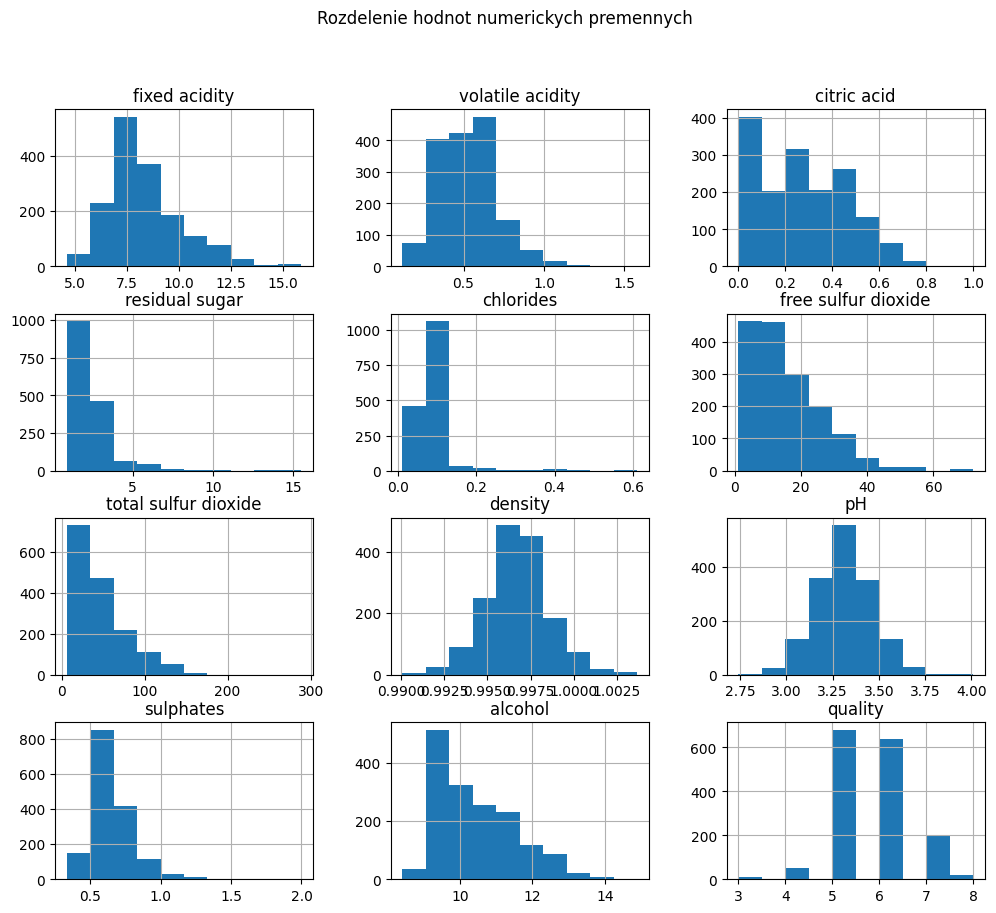

In [8]:
df.hist(figsize=(12,10))
plt.suptitle("Rozdelenie hodnot numerickych premennych")
plt.show()

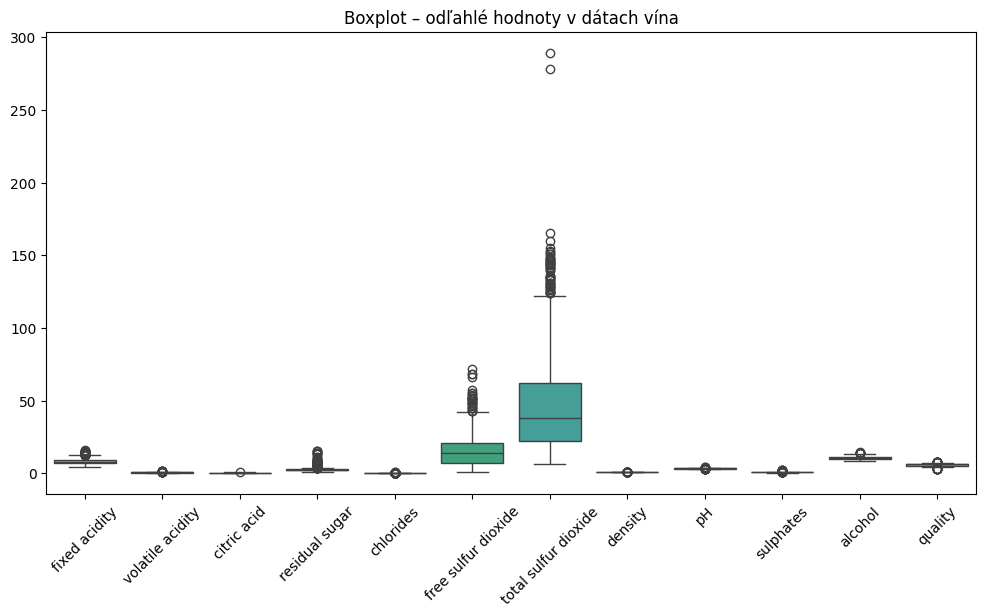

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot – odľahlé hodnoty v dátach vína")
plt.xticks(rotation=45)
plt.show()

Inferenčná analýza

Overenie, či sa obsah alkoholu významne líši medzi vínami s nízkou a vysokou kvalitou.
H₀ (nulová hypotéza): Priemerný obsah alkoholu je rovnaký pre obe skupiny.
H₁ (alternatívna hypotéza): Priemerný obsah alkoholu sa medzi skupinami líši.

In [10]:
low_quality = df[df['quality'] <= 5]['alcohol']
high_quality = df[df['quality'] >= 6]['alcohol']

print("Počet vín s nízkou kvalitou:", len(low_quality))
print("Počet vín s vysokou kvalitou:", len(high_quality))

Počet vín s nízkou kvalitou: 744
Počet vín s vysokou kvalitou: 855


In [11]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(high_quality, low_quality, equal_var=False)
print("t-statistika:", t_stat)
print("p-hodnota:", p_val)

t-statistika: 19.78218499094004
p-hodnota: 1.139484979295024e-77


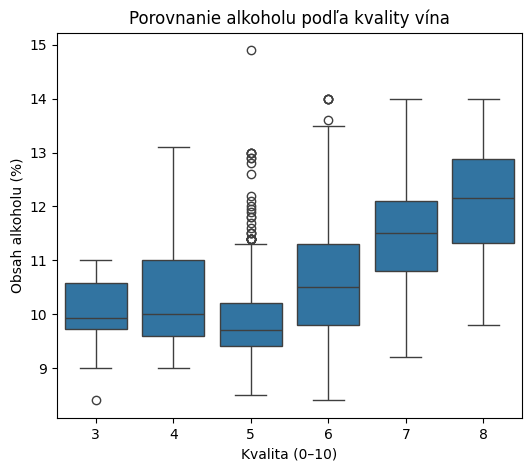

In [12]:
plt.figure(figsize=(6,5))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Porovnanie alkoholu podľa kvality vína")
plt.xlabel("Kvalita (0–10)")
plt.ylabel("Obsah alkoholu (%)")
plt.show()

Keďže p-hodnota je menšia ako 0.05, odmietame nulovú hypotézu H₀.
To znamená, že existuje štatisticky významný rozdiel v priemernom obsahu alkoholu medzi vínami s nízkou a vysokou kvalitou. Takže vína s vyššou kvalitou mávajú priemerne vyšší obsah alkoholu.

**Diagnostická analýza**

In [13]:
df.groupby('quality')[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']].mean().round(2)

,alcohol,volatile acidity,sulphates,citric acid
quality,,,,
3,9.96,0.88,0.57,0.17
4,10.27,0.69,0.60,0.17
5,9.90,0.58,0.62,0.24
6,10.63,0.50,0.68,0.27
7,11.47,0.40,0.74,0.38
8,12.09,0.42,0.77,0.39


In [14]:
corr = df.corr()['quality'].sort_values(ascending=False)
corr

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

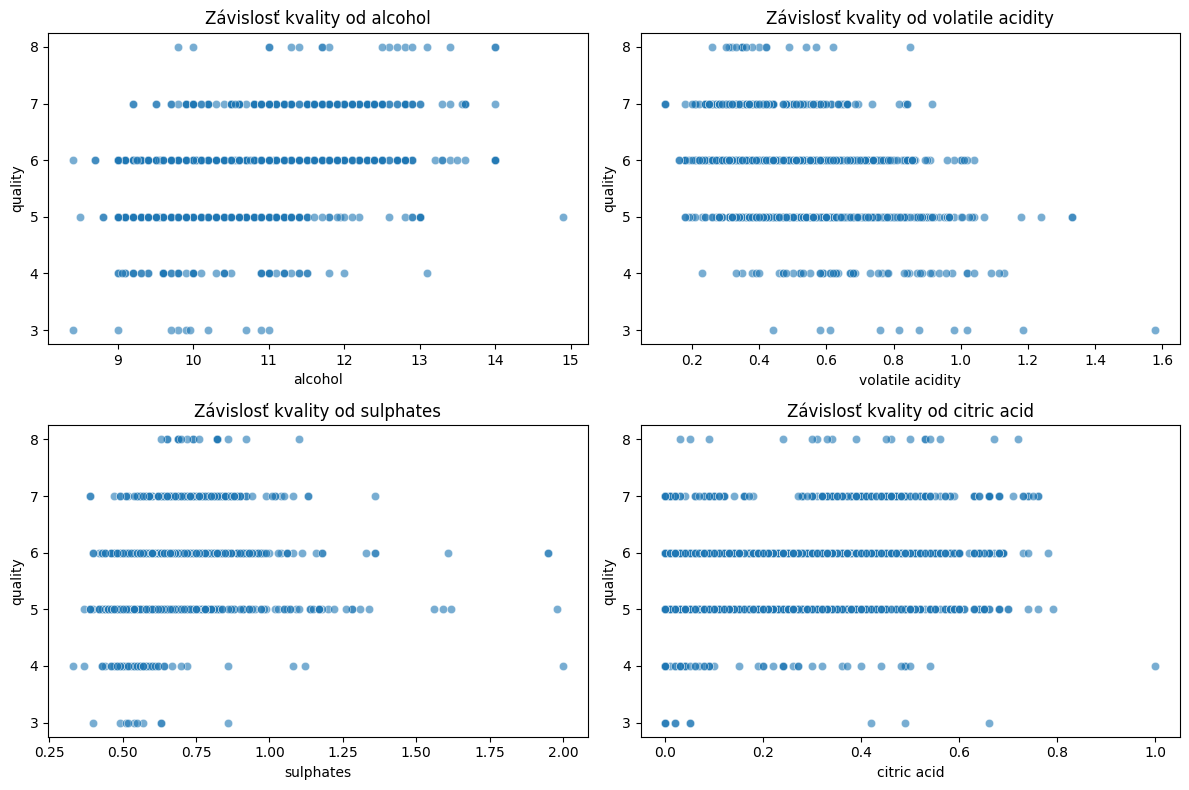

In [15]:
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=feature, y='quality', data=df, alpha=0.6)
    plt.title(f'Závislosť kvality od {feature}')
plt.tight_layout()
plt.show()

alcohol - stúpa s kvalitou - pozitívny vplyv

volatile acidity - čím viac, tým nižšia kvalita - negatívny vplyv

In [16]:
from sklearn.linear_model import LinearRegression

X = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']]
y = df['quality']

model = LinearRegression()
model.fit(X, y)

# koeficienty regresie
coefficients = pd.DataFrame({'Premenná': X.columns, 'Koeficient': model.coef_})
coefficients

,Premenná,Koeficient
0,alcohol,0.322875
1,volatile acidity,-1.301489
2,sulphates,0.679655
3,citric acid,-0.155014
4,density,15.105520


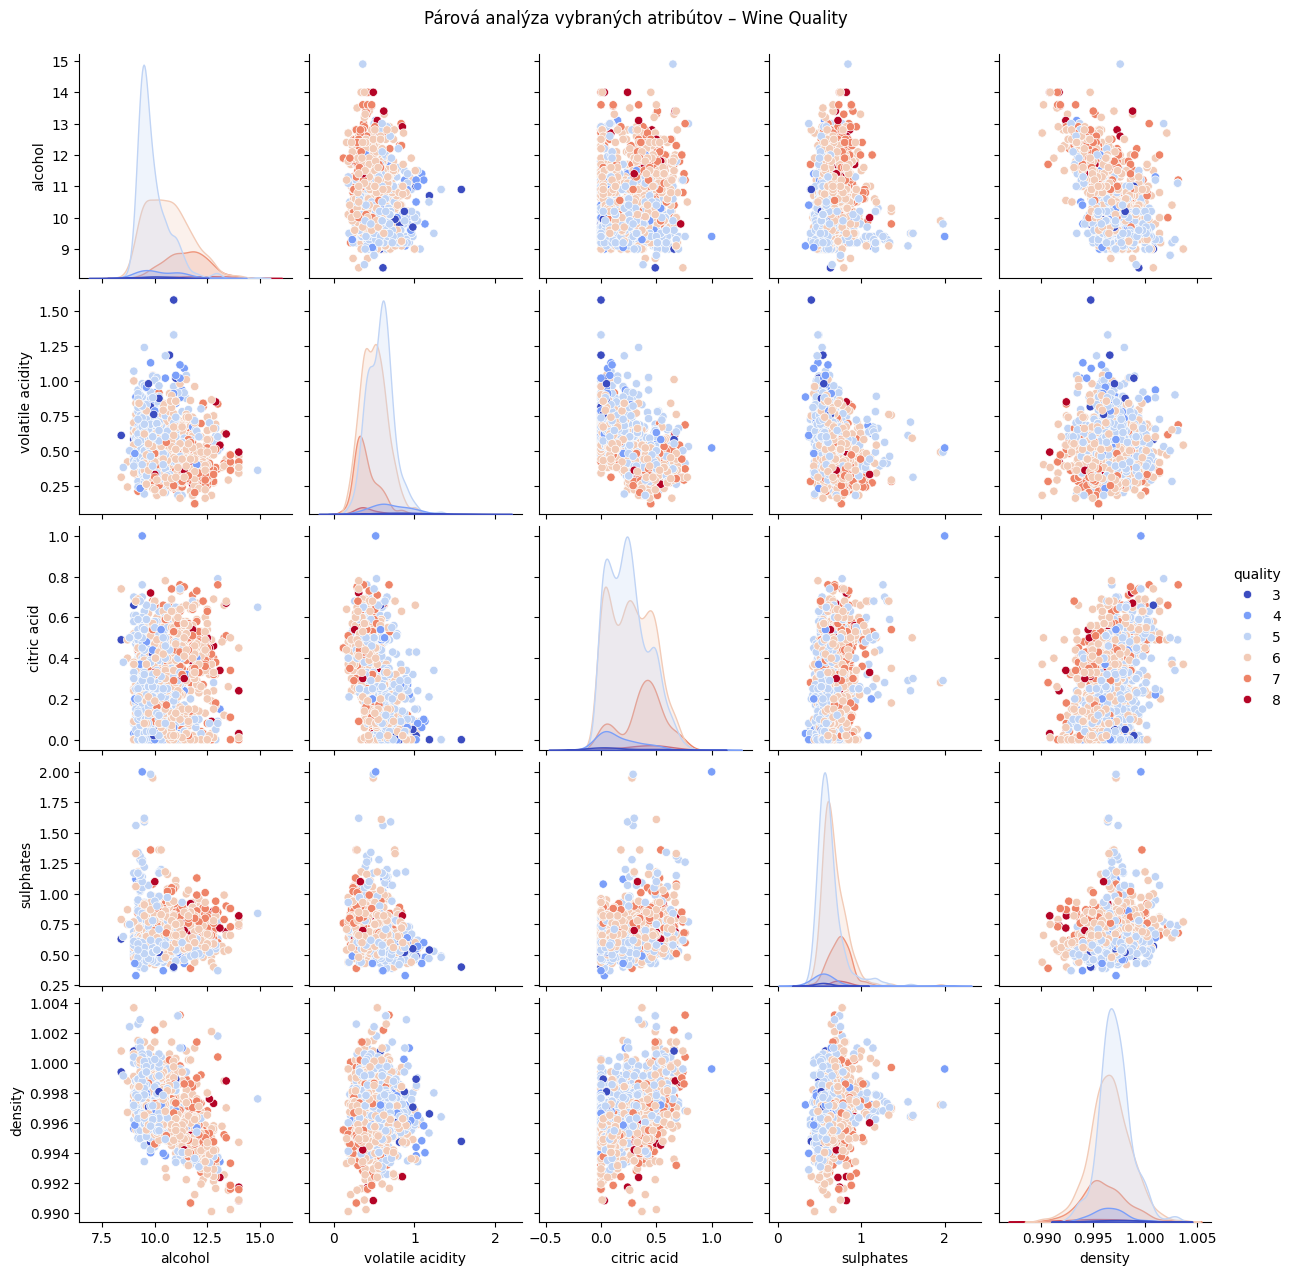

In [17]:
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density', 'quality']

sns.pairplot(df[selected_features], hue='quality', palette='coolwarm', diag_kind='kde')
plt.suptitle("Párová analýza vybraných atribútov – Wine Quality", y=1.02)
plt.show()

**Korelačná matica**

In [18]:
corr_matrix = df.corr()
corr_matrix.round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


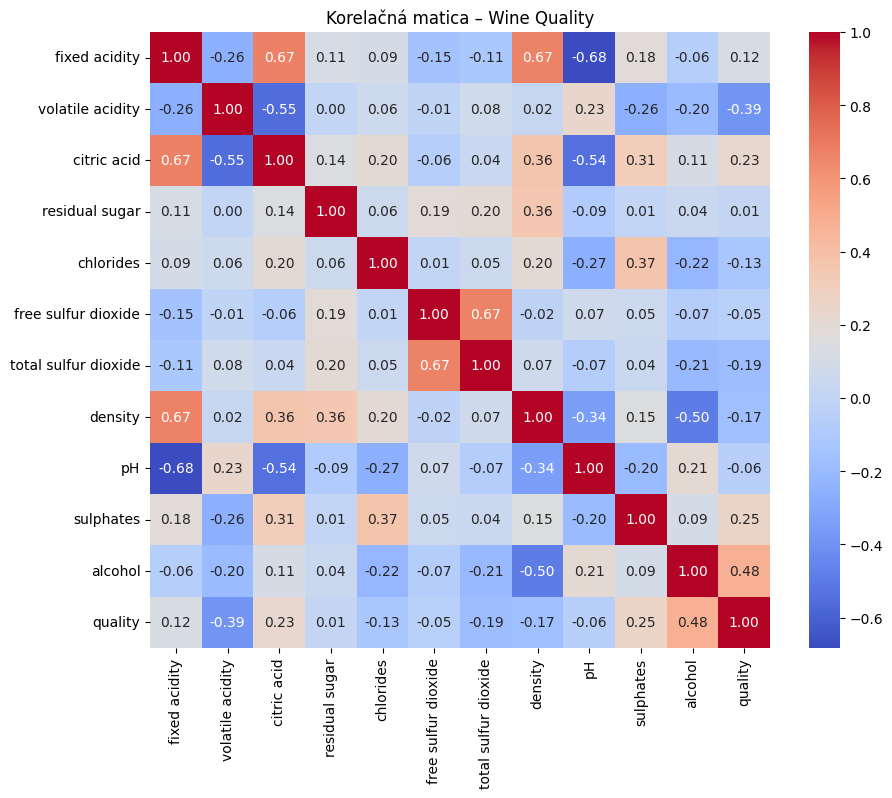

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelačná matica – Wine Quality")
plt.show()

In [20]:
corr_with_quality = corr_matrix['quality'].sort_values(ascending=False)
print(corr_with_quality)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


**Vzorkovanie pomocou pravdepodobností
Stratifikovaný výber**

C:\Users\sasve\AppData\Local\Temp\ipykernel_27236\3672864124.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='coolwarm')


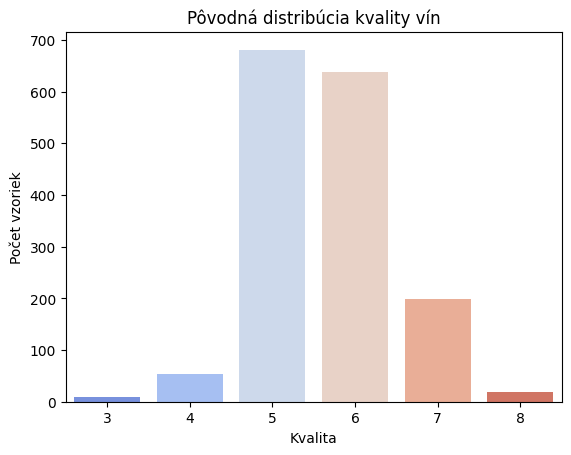

In [21]:
sns.countplot(x='quality', data=df, palette='coolwarm')
plt.title("Pôvodná distribúcia kvality vín")
plt.xlabel("Kvalita")
plt.ylabel("Počet vzoriek")
plt.show()

In [22]:
# Stratifikovaný výber – 20 % dát
train, sample_prob = train_test_split(
    df, 
    test_size=0.2, 
    stratify=df['quality'], 
    random_state=42
)

print("Pôvodný počet záznamov:", len(df))
print("Veľkosť vzorky:", len(sample_prob))

Pôvodný počet záznamov: 1599
Veľkosť vzorky: 320


C:\Users\sasve\AppData\Local\Temp\ipykernel_27236\2082694208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, ax=axes[0], palette='coolwarm')
C:\Users\sasve\AppData\Local\Temp\ipykernel_27236\2082694208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=sample_prob, ax=axes[1], palette='viridis')


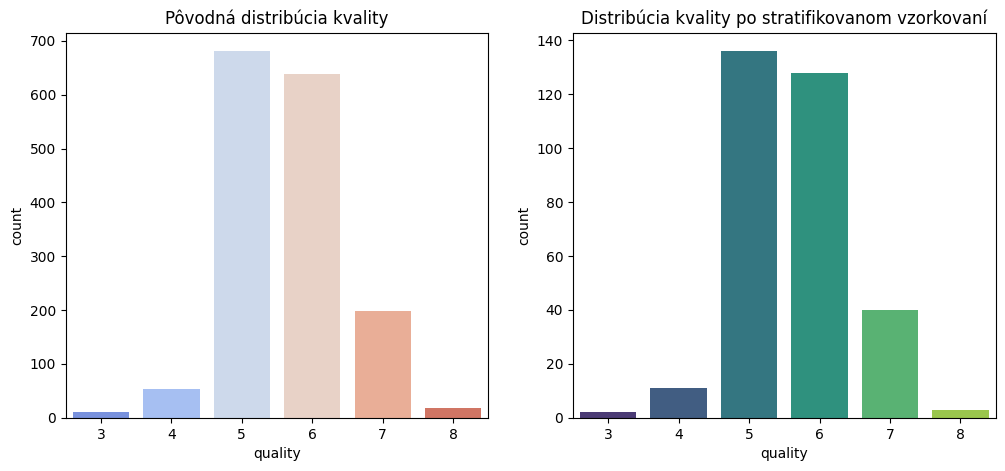

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='quality', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("Pôvodná distribúcia kvality")

sns.countplot(x='quality', data=sample_prob, ax=axes[1], palette='viridis')
axes[1].set_title("Distribúcia kvality po stratifikovanom vzorkovaní")

plt.show()

**Vzorkovanie bez pomoci pravdepodobnosti**

In [24]:
# Účelový výber: len vína s extrémnou kvalitou (3-4 a 7-8)
vzorka_ucelovy = df[(df['quality'] <= 4) | (df['quality'] >= 7)]

print("Veľkosť pôvodného datasetu:", len(df))
print("Veľkosť účelovej vzorky:", len(vzorka_ucelovy))

Veľkosť pôvodného datasetu: 1599
Veľkosť účelovej vzorky: 280


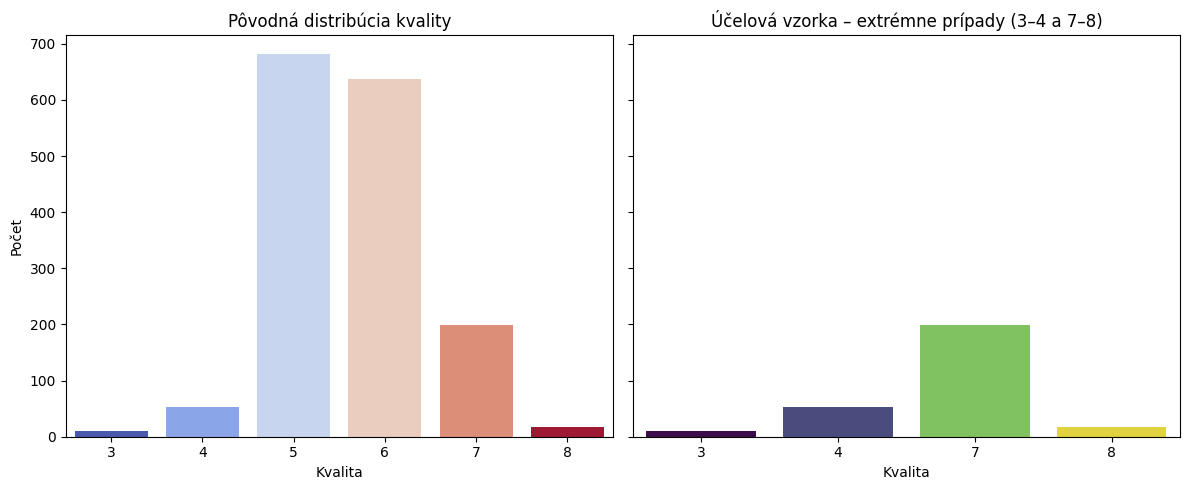

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='quality', hue='quality', data=df, palette='coolwarm', legend=False, ax=axes[0])
axes[0].set_title("Pôvodná distribúcia kvality")
axes[0].set_xlabel("Kvalita"); axes[0].set_ylabel("Počet")

sns.countplot(x='quality', hue='quality', data=vzorka_ucelovy, palette='viridis', legend=False, ax=axes[1])
axes[1].set_title("Účelová vzorka – extrémne prípady (3–4 a 7–8)")
axes[1].set_xlabel("Kvalita"); axes[1].set_ylabel("Počet")

plt.tight_layout()
plt.show()

In [26]:
# Porovnanie priemerov vybraných atribútov
vybrane_atributy = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density']

porovnanie = df.groupby('quality')[vybrane_atributy].mean().round(2)
porovnanie.loc[[3,4,7,8]]

,alcohol,volatile acidity,sulphates,citric acid,density
quality,,,,,
3,9.96,0.88,0.57,0.17,1.0
4,10.27,0.69,0.60,0.17,1.0
7,11.47,0.40,0.74,0.38,1.0
8,12.09,0.42,0.77,0.39,1.0


Vína s vyššou kvalitou majú vyšší obsah alkoholu,
nižšiu prchavú kyslosť a odlišné chemické zloženie,
čo zodpovedá záverom predchádzajúcej diagnostickej analýzy.

C:\Users\sasve\AppData\Local\Temp\ipykernel_27236\3000323772.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=vzorka_ucelovy, palette='coolwarm')


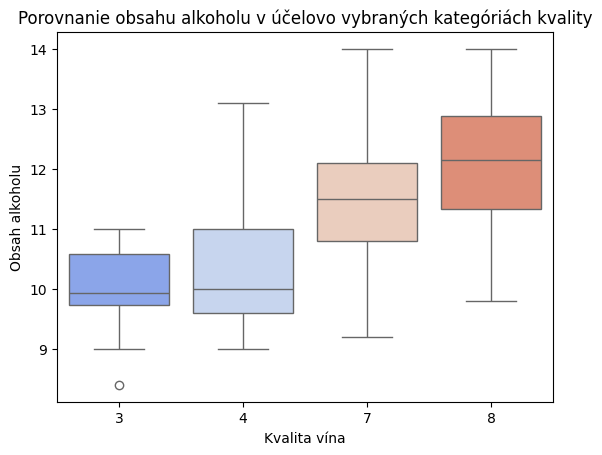

In [27]:
sns.boxplot(x='quality', y='alcohol', data=vzorka_ucelovy, palette='coolwarm')
plt.title("Porovnanie obsahu alkoholu v účelovo vybraných kategóriách kvality")
plt.xlabel("Kvalita vína")
plt.ylabel("Obsah alkoholu")
plt.show()

**Revzorkovanie - Bootstrapping**

In [28]:
mean_alcohol = df['alcohol'].mean()
print("Pôvodný priemer alkoholu:", round(mean_alcohol, 3))

Pôvodný priemer alkoholu: 10.423


In [29]:
n = len(df)                 # počet riadkov v datasete
n_iter = 1000               # počet bootstrap opakovaní
bootstrap_means = []        # sem uložíme výsledky

for i in range(n_iter):
    bootstrap_sample = df.sample(n=n, replace=True)  # náhodný výber s návratom
    bootstrap_mean = bootstrap_sample['alcohol'].mean()
    bootstrap_means.append(bootstrap_mean)

bootstrap_means = np.array(bootstrap_means)

In [30]:
lower = np.percentile(bootstrap_means, 2.5)
upper = np.percentile(bootstrap_means, 97.5)

print("95 % interval spoľahlivosti:", round(lower, 3), "-", round(upper, 3))

95 % interval spoľahlivosti: 10.37 - 10.476


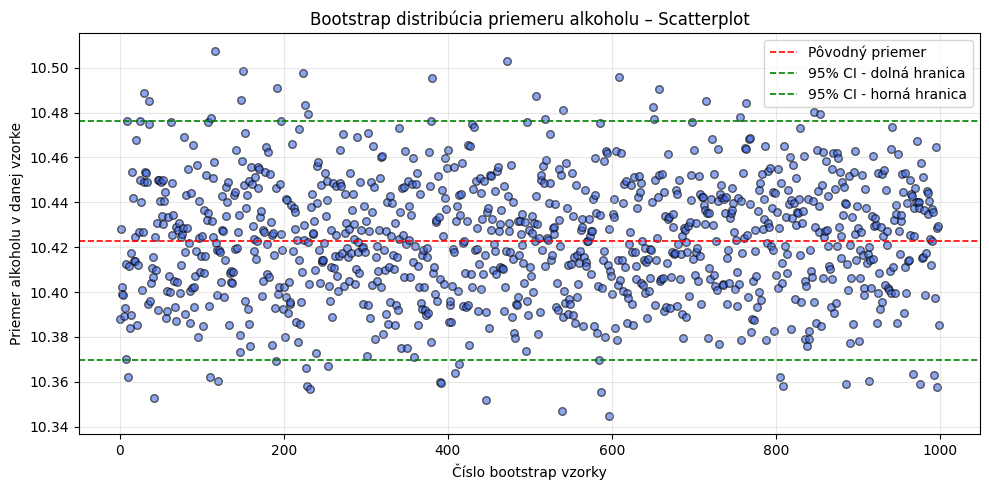

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(bootstrap_means)), bootstrap_means, 
            color='royalblue', alpha=0.6, edgecolor='k', s=30)

# vyznačenie pôvodného priemeru a intervalu
plt.axhline(mean_alcohol, color='red', linestyle='--', linewidth=1.2, label='Pôvodný priemer')
plt.axhline(lower, color='green', linestyle='--', linewidth=1.2, label='95% CI - dolná hranica')
plt.axhline(upper, color='green', linestyle='--', linewidth=1.2, label='95% CI - horná hranica')

plt.title("Bootstrap distribúcia priemeru alkoholu – Scatterplot")
plt.xlabel("Číslo bootstrap vzorky")
plt.ylabel("Priemer alkoholu v danej vzorke")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Podvzorkovanie**

In [32]:
df = df.copy()
df['label'] = np.where(df['quality'] >= 6, 'High', 'Low')

print(df['label'].value_counts())

label
High    855
Low     744
Name: count, dtype: int64


In [33]:
from imblearn.under_sampling import AllKNN
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=[np.number]).drop(columns=['quality']).values
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

allknn = AllKNN(n_neighbors=3, kind_sel='all', allow_minority=True)
X_resampled, y_resampled = allknn.fit_resample(X_scaled, y)

In [34]:
import pandas as pd
from collections import Counter

print("Pred podvzorkovaním:", Counter(y))
print("Po podvzorkovaní:", Counter(y_resampled))

Pred podvzorkovaním: Counter({'High': 855, 'Low': 744})
Po podvzorkovaní: Counter({'High': 560, 'Low': 510})


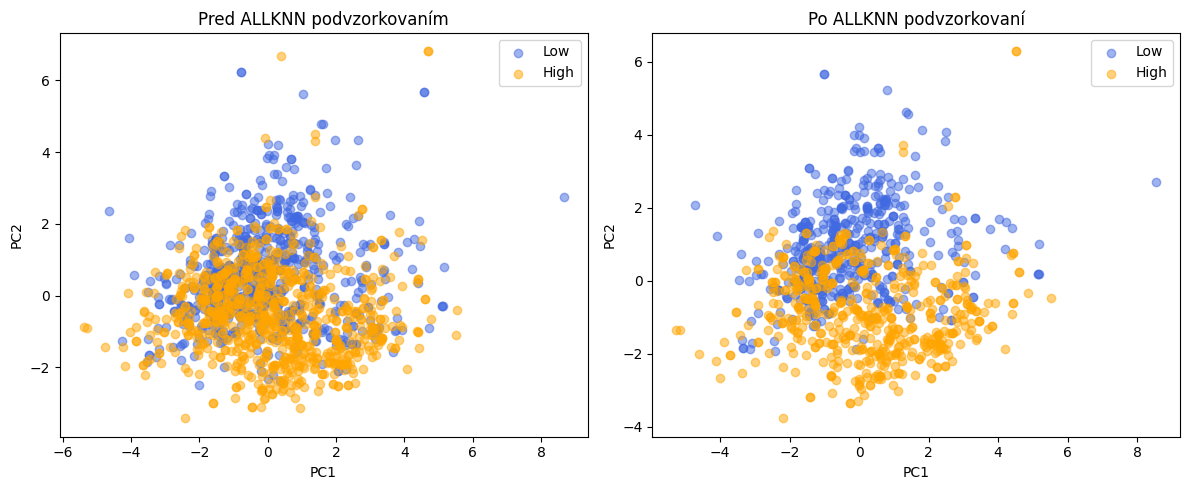

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_scaled)
X_pca_after = pca.fit_transform(X_resampled)

# pred podvzorkovaním
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca_before[y=='Low', 0], X_pca_before[y=='Low', 1], alpha=0.5, label='Low', color='royalblue')
plt.scatter(X_pca_before[y=='High', 0], X_pca_before[y=='High', 1], alpha=0.5, label='High', color='orange')
plt.title("Pred ALLKNN podvzorkovaním")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()

# po podvzorkovaní
plt.subplot(1,2,2)
plt.scatter(X_pca_after[y_resampled=='Low', 0], X_pca_after[y_resampled=='Low', 1], alpha=0.5, label='Low', color='royalblue')
plt.scatter(X_pca_after[y_resampled=='High', 0], X_pca_after[y_resampled=='High', 1], alpha=0.5, label='High', color='orange')
plt.title("Po ALLKNN podvzorkovaní")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()

**Prevzorkovanie**

In [36]:
df = df.copy()
if 'label' not in df.columns:
    df['label'] = np.where(df['quality'] >= 6, 'High', 'Low')

print(df['label'].value_counts())

label
High    855
Low     744
Name: count, dtype: int64


In [37]:
X = df.select_dtypes(include=[np.number]).drop(columns=['quality']).values
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42, k_neighbors=5)

X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Pred prevzorkovaním:", Counter(y))
print("Po prevzorkovaní:", Counter(y_resampled))

Pred prevzorkovaním: Counter({'High': 855, 'Low': 744})
Po prevzorkovaní: Counter({'Low': 855, 'High': 855})


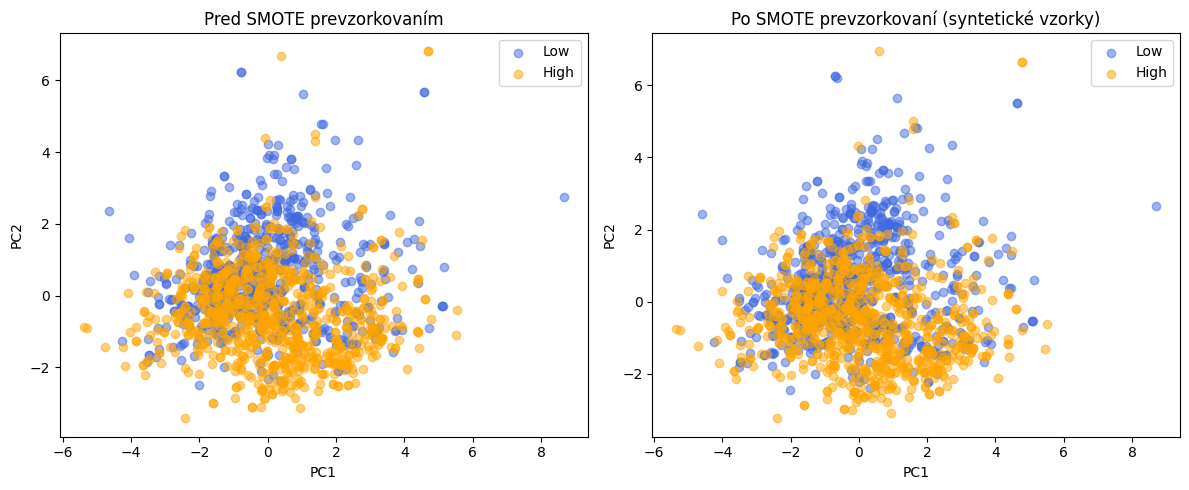

In [39]:
pca = PCA(n_components=2, random_state=42)
X_before = pca.fit_transform(X_scaled)
X_after = pca.fit_transform(X_resampled)

plt.figure(figsize=(12,5))

# pred SMOTE
plt.subplot(1,2,1)
plt.scatter(X_before[y=='Low',0], X_before[y=='Low',1], color='royalblue', alpha=0.5, label='Low')
plt.scatter(X_before[y=='High',0], X_before[y=='High',1], color='orange', alpha=0.5, label='High')
plt.title("Pred SMOTE prevzorkovaním")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()

# po SMOTE
plt.subplot(1,2,2)
plt.scatter(X_after[y_resampled=='Low',0], X_after[y_resampled=='Low',1], color='royalblue', alpha=0.5, label='Low')
plt.scatter(X_after[y_resampled=='High',0], X_after[y_resampled=='High',1], color='orange', alpha=0.5, label='High')
plt.title("Po SMOTE prevzorkovaní (syntetické vzorky)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()

plt.tight_layout()
plt.show()

**Manipulácia parametrov**

In [40]:
df = df.copy()

# Pomery medzi dôležitými vlastnosťami vína
df['density_to_alcohol'] = df['density'] / df['alcohol']

# Kombinácia kyslosti
df['acid_index'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

# Pomerný obsah síranov k chloridom
df['sulphate_chloride_ratio'] = df['sulphates'] / df['chlorides']

# kontrola
df[['density_to_alcohol', 'acid_index', 'sulphate_chloride_ratio']].head()

,density_to_alcohol,acid_index,sulphate_chloride_ratio
0,0.106149,8.10,7.368421
1,0.101714,8.68,6.938776
2,0.101735,8.60,7.065217
3,0.101837,12.04,7.733333
4,0.106149,8.10,7.368421


In [41]:
print("Počet prázdnych hodnôt v datasetu:\n", df.isna().sum())
df = df.fillna(df.mean(numeric_only=True))

Počet prázdnych hodnôt v datasetu:
 fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
label                      0
density_to_alcohol         0
acid_index                 0
sulphate_chloride_ratio    0
dtype: int64


**Maskovanie**

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label_encoded'] = encoder.fit_transform(df['label'])
print(df[['label', 'label_encoded']].drop_duplicates())

  label  label_encoded
0   Low              1
3  High              0


**Normalizácia - MinMax, RobustScale, Logaritmická**

In [43]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

feature = 'alcohol'
data = df[[feature]].copy()

print("Základné štatistiky pred normalizáciou:")
print(data.describe())

Základné štatistiky pred normalizáciou:
           alcohol
count  1599.000000
mean     10.422983
std       1.065668
min       8.400000
25%       9.500000
50%      10.200000
75%      11.100000
max      14.900000


In [44]:
minmax_scaler = MinMaxScaler()
data['MinMax'] = minmax_scaler.fit_transform(data[[feature]])

robust_scaler = RobustScaler()
data['Robust'] = robust_scaler.fit_transform(data[[feature]])

data['Log'] = np.log1p(data[feature])

data.head()

,alcohol,MinMax,Robust,Log
0,9.4,0.153846,-0.50,2.341806
1,9.8,0.215385,-0.25,2.379546
2,9.8,0.215385,-0.25,2.379546
3,9.8,0.215385,-0.25,2.379546
4,9.4,0.153846,-0.50,2.341806


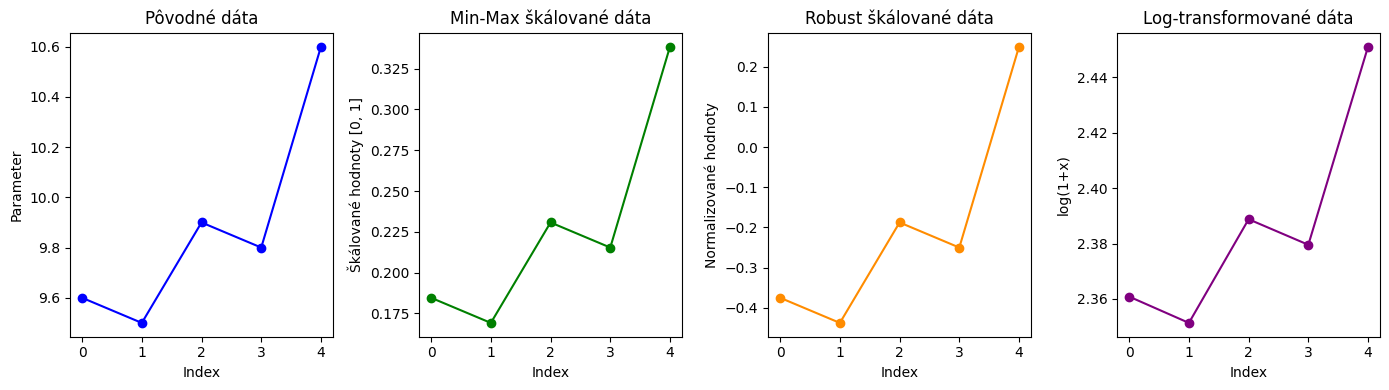

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

sample = data.sample(5, random_state=42).reset_index(drop=True)

# pôvodné dáta
axes[0].plot(sample.index, sample[feature], marker='o', color='blue')
axes[0].set_title("Pôvodné dáta")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Parameter")

# Min-Max
axes[1].plot(sample.index, sample['MinMax'], marker='o', color='green')
axes[1].set_title("Min-Max škálované dáta")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Škálované hodnoty [0, 1]")

# Robust
axes[2].plot(sample.index, sample['Robust'], marker='o', color='darkorange')
axes[2].set_title("Robust škálované dáta")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Normalizované hodnoty")

# Logaritmická
axes[3].plot(sample.index, sample['Log'], marker='o', color='purple')
axes[3].set_title("Log-transformované dáta")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("log(1+x)")

plt.tight_layout()
plt.show()


**PCA analýza**

In [51]:
from sklearn.decomposition import PCA
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in ['quality', 'label_encoded']:
    if col in num_cols:
        num_cols.remove(col)

X = df[num_cols].values

# štandardizácia – PCA vyžaduje rovnakú mierku pre všetky atribúty
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Počet použitých atribútov:", len(num_cols))

Počet použitých atribútov: 14


Ideálny počet PCA komponentov pre 95 % vysvetlenej variance: 9


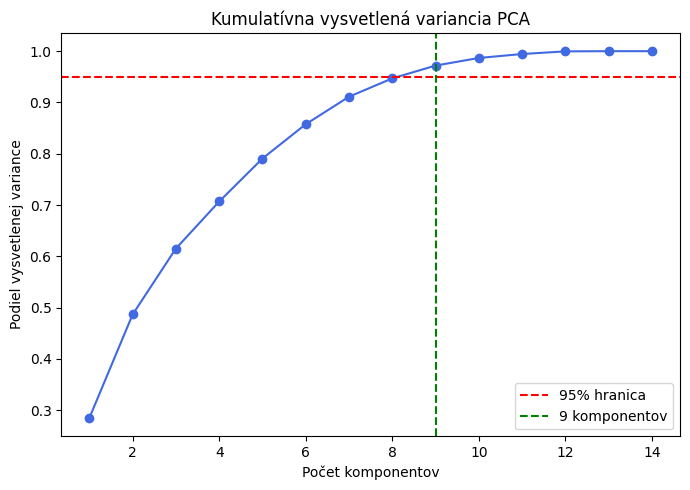

In [52]:
pca = PCA().fit(X_scaled)

explained_var = np.cumsum(pca.explained_variance_ratio_)

# zistenie počtu komponentov pre 95 % variance
n_components_95 = np.argmax(explained_var >= 0.95) + 1
print(f"Ideálny počet PCA komponentov pre 95 % vysvetlenej variance: {n_components_95}")

# graf
plt.figure(figsize=(7,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', color='royalblue')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% hranica')
plt.axvline(x=n_components_95, color='g', linestyle='--', label=f'{n_components_95} komponentov')
plt.title("Kumulatívna vysvetlená variancia PCA")
plt.xlabel("Počet komponentov")
plt.ylabel("Podiel vysvetlenej variance")
plt.legend()
plt.tight_layout()
plt.show()

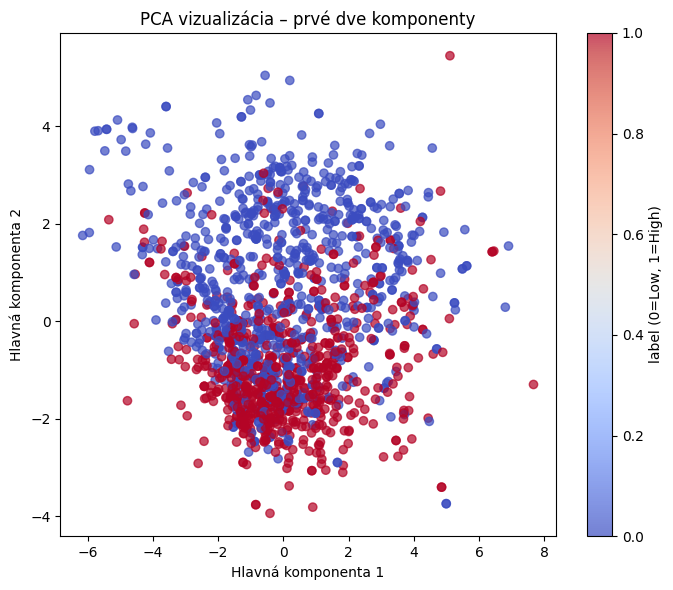

In [53]:
# aplikácia PCA s 2 komponentmi pre vizualizáciu
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=df['label_encoded'], cmap='coolwarm', alpha=0.7)
plt.title("PCA vizualizácia – prvé dve komponenty")
plt.xlabel("Hlavná komponenta 1")
plt.ylabel("Hlavná komponenta 2")
plt.colorbar(label="label (0=Low, 1=High)")
plt.tight_layout()
plt.show()


In [54]:
corr = df[num_cols + ['quality']].corr(numeric_only=True)['quality'].sort_values(ascending=False)
print("Parametre najviac korelujúce s kvalitou:\n")
print(corr.head(10))

Parametre najviac korelujúce s kvalitou:

quality                    1.000000
alcohol                    0.476166
sulphate_chloride_ratio    0.364265
sulphates                  0.251397
citric acid                0.226373
fixed acidity              0.124052
acid_index                 0.103754
residual sugar             0.013732
free sulfur dioxide       -0.050656
pH                        -0.057731
Name: quality, dtype: float64
